# **BINOMIAL PRICING MODEL - AMEICAN OPTIONS**

In [ ]:
#installing library
!pip install yfinance

**IMPORTING THE LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date

import warnings
warnings.filterwarnings("ignore")

# to fetch data
import yfinance as yf

import scipy.stats as ss

**IMPORTING DATA**

In [ ]:
symbol = 'SPY'
end = date.today()
start = end.replace(year = 2023)

tickerData = yf.Ticker(symbol)

# Read data
df = tickerData.history(start=start, end=end)


df.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-12-23 00:00:00-05:00,590.890015,595.299988,587.659973,594.690002,57635800,0.0,0.0,0.0
2024-12-24 00:00:00-05:00,596.059998,601.340027,595.469971,601.299988,33160100,0.0,0.0,0.0
2024-12-26 00:00:00-05:00,599.500000,602.479980,598.080017,601.340027,41219100,0.0,0.0,0.0
2024-12-27 00:00:00-05:00,597.539978,597.780029,590.760010,595.010010,64969300,0.0,0.0,0.0
2024-12-30 00:00:00-05:00,587.890015,591.739990,584.409973,588.219971,56483600,0.0,0.0,0.0


In [ ]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-01-02 00:00:00-05:00,466.180156,467.671042,464.531293,466.663940,123623700,0.0,0.0,0.0
2024-01-03 00:00:00-05:00,464.472089,465.222473,462.240732,462.852875,103585900,0.0,0.0,0.0
2024-01-04 00:00:00-05:00,462.369040,464.995355,461.134871,461.361969,84232200,0.0,0.0,0.0
2024-01-05 00:00:00-05:00,461.569319,464.481970,460.522747,461.993896,86060800,0.0,0.0,0.0
2024-01-08 00:00:00-05:00,462.497393,468.737358,462.369034,468.589264,74879100,0.0,0.0,0.0


In [ ]:
symbol = 'SPY'  #the ticker of the stock whose data is to be taken out
dfo = yf.Ticker(symbol)

In [ ]:
dfo.options  #to get the date of different expiration time

('2024-12-31',
 '2025-01-02',
 '2025-01-03',
 '2025-01-06',
 '2025-01-07',
 '2025-01-08',
 '2025-01-09',
 '2025-01-10',
 '2025-01-17',
 '2025-01-24',
 '2025-01-31',
 '2025-02-07',
 '2025-02-21',
 '2025-02-28',
 '2025-03-21',
 '2025-03-31',
 '2025-04-17',
 '2025-04-30',
 '2025-05-16',
 '2025-05-30',
 '2025-06-20',
 '2025-06-30',
 '2025-07-18',
 '2025-08-15',
 '2025-09-19',
 '2025-09-30',
 '2025-12-19',
 '2025-12-31',
 '2026-01-16',
 '2026-03-20',
 '2026-06-18',
 '2026-12-18',
 '2027-01-15')

In [ ]:
dfo_exp = dfo.option_chain(dfo.options[1])  #you can change index to try on different expiry dates

In [ ]:
dfo_exp.calls.head() #Data for call options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPY250102C00400000,2024-12-31 15:52:24+00:00,400.0,189.27,187.44,188.32,-3.529999,-1.830912,2.0,7,1.876954,True,REGULAR,USD
1,SPY250102C00410000,2024-12-20 14:58:59+00:00,410.0,173.41,177.35,178.21,0.000000,0.000000,4.0,2,1.691408,True,REGULAR,USD
2,SPY250102C00420000,2024-12-31 14:42:26+00:00,420.0,169.01,167.43,168.32,-4.120010,-2.379721,2.0,107,1.660158,True,REGULAR,USD
3,SPY250102C00430000,2024-12-26 16:09:47+00:00,430.0,171.19,157.10,158.15,0.000000,0.000000,3.0,85,1.318363,True,REGULAR,USD
4,SPY250102C00440000,2024-12-20 14:59:13+00:00,440.0,143.48,147.25,148.17,0.000000,0.000000,4.0,2,1.332035,True,REGULAR,USD


# **Calculation of u and d**

u =size of the up move factor=
 e^{σ\sqrt{t}}, and

d =size of the down move factor=
 = e^{−σ\sqrt{t}}
 = 1/ u

σ is the annual volatility of the underlying asset’s returns and t is the length of the step in the binomial model.

To calculate annual volatility:-

First calculate the daily returns of the asset

Then calculate its standard deviation

Then multiply it by sqrt(252) as in a year there are 252 trading days.



In [ ]:
def annual_vol(df):
    """
    Function to calculate annual volatility

    Parameters
    ----------
    df : dataframe
         Stock info

    Returns
    -------
    vol : float
        annual volatility of the stock
    """
    log_return = np.log(df['Close'] / df['Close'].shift(1))
    log_return = log_return.dropna()
    daily_vol = log_return.std()
    vol = daily_vol * np.sqrt(252)

    return vol

In [ ]:
vol = annual_vol(df)
vol

0.12610092399068792

In [ ]:
dfo.options[1]

'2025-01-02'

In [ ]:
date.today()

datetime.date(2024, 12, 31)

In [ ]:
from datetime import datetime

# Example: Expiration date (change this to the actual expiration date)
expiration_date = datetime (2025, 1, 2)  # Replace with your option's expiration date

# Current date
current_date = datetime.now()

# Calculate the number of days left
days_left = (expiration_date - current_date).days

# Convert days_left to years (assuming 365 days in a year)
T = days_left / 365

print(f"Time to expiration in years (T): {T}")
N = 100          #Number of steps
# T = /365      #Calculate the number of days left for expiry from your calculation in years, change accordingly
t = T/N


Time to expiration in years (T): 0.0027397260273972603


In [ ]:
log_return = np.log(df['Close'] / df['Close'].shift(1))
log_return = log_return.dropna()
daily_vol = log_return.std()

u =u = np.exp(daily_vol * np.sqrt(t))
u

1.0000415796275635

In [ ]:
d = np.exp(-daily_vol * np.sqrt(t))
d

0.9999584221012301

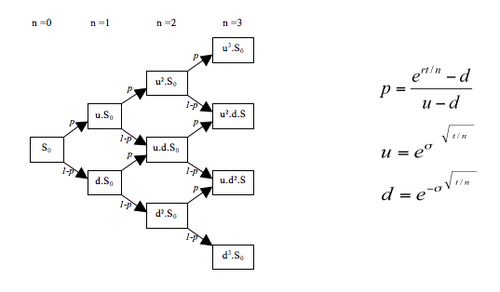

In [ ]:

import numpy as np

def first_binomial_american(S, K, T, r, u, d, N, option_type):
    """
    Implementation of binomial pricing model for American options.

    Parameters
    ----------
    S : float
        Stock price
    K : float
        Strike price
    T : float
        Expiry time in years
    r : float
        Risk-free rate (annualized, continuous compounding)
    u : float
        Size of up move factor
    d : float
        Size of down move factor
    N : int
        Number of steps in the binomial model
    option_type : char
        'C' for Call, 'P' for Put

    Returns
    -------
    price : float
        Returns the price of the option
    """

    # Calculate the time step size
    dt = T / N

    # Calculate risk-neutral probabilities
    p_up = (np.exp(r * dt) - d) / (u - d)
    p_down = 1 - p_up

    # Initialize the option values at maturity
    option_values = np.zeros(N + 1)

    # Calculate the option values at the final step (maturity)
    for i in range(N + 1):
        S_T = S * (u ** i) * (d ** (N - i))  # Stock price at maturity
        if option_type == 'C':
            option_values[i] = max(0, S_T - K)  # Call option payoff
        elif option_type == 'P':
            option_values[i] = max(0, K - S_T)  # Put option payoff

    # Backward induction to calculate option price at each node
    for n in range(N - 1, -1, -1):
        for i in range(n + 1):
            S_t = S * (u ** i) * (d ** (n - i))  # Stock price at current node
            # Calculate option value assuming no early exercise (continuation value)
            continuation_value = np.exp(-r * dt) * (p_up * option_values[i + 1] + p_down * option_values[i])
            # American option: take the maximum of continuation value and early exercise value
            if option_type == 'C':
                option_values[i] = max(continuation_value, S_t - K)  # Call option
            elif option_type == 'P':
                option_values[i] = max(continuation_value, K - S_t)  # Put option

    # The option price is at the initial node (time 0)
    return option_values[0]


In [ ]:
#r is the risk free rate taken from the 10 years us treasury bond
#call price calculated by n step binomial model
call = {}
for K in dfo_exp.calls['strike']:
    call[K] = first_binomial_american(
        S=df['Close'].iloc[-1],
        K=K,
        T=T,
        r=0.01 * t,
        u=u,
        d=d,
        N=N,
        option_type='C'
    )

th_call = pd.DataFrame.from_dict(call, orient='index', columns=['th_call'])
th_call.head()

,th_call
400.0,188.219971
410.0,178.219971
420.0,168.219971
430.0,158.219971
440.0,148.219971


In [ ]:
#actual call price
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace=True)
ac_call.head()

,ac_call
strike,
400.0,189.27
410.0,173.41
420.0,169.01
430.0,171.19
440.0,143.48


In [ ]:
call = th_call
call["ac_call"] = ac_call
call.head(10)

,th_call,ac_call
400.0,188.219971,189.27
410.0,178.219971,173.41
420.0,168.219971,169.01
430.0,158.219971,171.19
440.0,148.219971,143.48
450.0,138.219971,133.49
460.0,128.219971,123.58
470.0,118.219971,113.64
480.0,108.219971,103.73
499.0,89.219971,84.90


<Axes: >

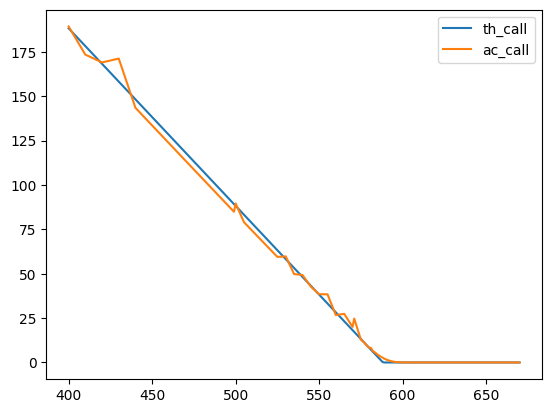

In [ ]:
call.plot() #plotting the actual and theoretical option prices

In [ ]:
#r is the risk free rate taken from the 10 years us treasury bond
#put price calculated by n step binomial model
put = {}
for K in dfo_exp.puts['strike']:
    put_price = first_binomial_american(
        S=df['Close'][len(df)-1],
        K=K,
        T=T,
        r=0.01 * t,
        u=u,
        d=d,
        N=N,
        option_type='P'
    )
    put[K] = put_price

th_put = pd.DataFrame.from_dict(put, orient='index')
th_put.rename(columns={0: "th_put"}, inplace=True)
th_put.head()

,th_put
400.0,0.0
410.0,0.0
420.0,0.0
430.0,0.0
440.0,0.0


In [ ]:
#actual put price
ac_put = dfo_exp.puts.loc[:, ['strike', 'lastPrice']]
ac_put.set_index('strike', inplace = True)
ac_put.rename(columns = {"lastPrice":"ac_put"}, inplace=True)
ac_put.head()

,ac_put
strike,
400.0,0.01
410.0,0.02
420.0,0.01
430.0,0.02
440.0,0.02


In [ ]:
put = th_put
put["ac_put"] = ac_put
put.head(10)

,th_put,ac_put
400.0,0.0,0.01
410.0,0.0,0.02
420.0,0.0,0.01
430.0,0.0,0.02
440.0,0.0,0.02
450.0,0.0,0.01
460.0,0.0,0.01
470.0,0.0,0.01
480.0,0.0,0.02
490.0,0.0,0.01


<Axes: >

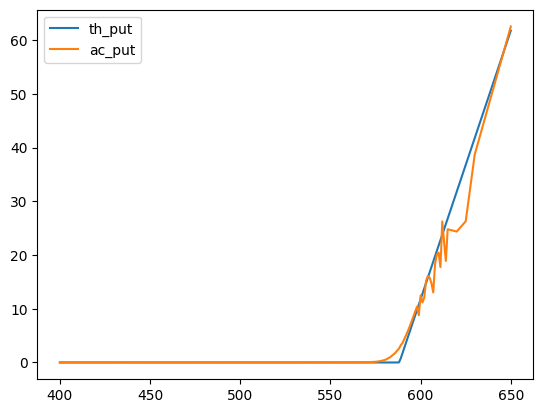

In [ ]:
put.plot() #plotting the actual and theoretical option prices